In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom
import seaborn as sns
from sklearn import preprocessing
from sklearn.datasets import load_iris
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

color_blind_list = sns.color_palette()

# TP4 - Bagging and Random Forests

Math question : Let us consider L binary independent classifiers where the probability of a correct
prediction is p > 0.5. Then, the prediction of the aggregation of models follows a Binomial distribution
with parameters p and L (Why ?).

The binomial distribution describes the binary outcome (success/failure) of an experiment repeated multiple times: this can be applied very easily to our situation, where the aggregation of models corresponds to the repetition of the classification experiment. Moreover, prediction can be either right or wrong, thus reconducing us to a binary outcome as in the case of classification (be it binary or not), and they are independent, since models don't interact between them for hypothesis.

Having satisfied the above requirements, we can say that the aggregated prediction follows a Binomial distribution with parameters p and L, where p is the probability of success (correct prediction) of the single model corresponding to the probability of success of the single outcome and L is the number of times the experiment is repeated.

### 1) If p = 0.7 (which means a probability slightly greater than by chance) and L = 10, which is the probability of correct prediction for the aggregation of models ?

In order to get a correct prediction for the aggregation of models, supposing we are using the majority vote rule, we need to have at least L/2 + 1 correct predictions from models. We can easily compute this probability using the cumulative density function of a binomial distribution.

In [2]:
L=10
p=0.7

# Since cdf equality returns minor AND equal, 1 - cdf should be computed on L/2 (x > 5 -> 6, 7, 8...)
h = L/2
proba = 1 - binom.cdf(h, L, p)
print('Probability of correct prediction for aggregated models: ' + str(proba))

Probability of correct prediction for aggregated models: 0.8497316674


This gives us an ulterior confirmation about the fact that using ensemble classifiers improves the quality of results: using 10 classifiers instead of one we have been able to increase our probability of correct prediction by 14%, which is a considerable result!

### 1) Use Bagging with first decision trees of depth 1 (called stumps) and then with decision trees characterized by a greater depth.
Use the following code :

In [3]:
# Function used to create Bagging Sample
# just in case of need...
def createBaggingSamples(data, num_sample=1):
    sample = []
    while len(sample) < num_sample:
        index = np.random.randrange(0, len(dataset))
        sample.append(dataset[index])
    return sample

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 1 * (0.5 - rng.rand(16))

max_n_estimators = 100
tree_max_depth = 30
estimator_rg = range(5, max_n_estimators, 5)

# We will create a "dict matrix" with upper index corresponding to maximum 
# tree depth and lower index corresponding to number of estimators
trees = {}
baggers = {}

for i in range(1, tree_max_depth):
    trees[i] = {}
    baggers[i] = {}
    for j in estimator_rg:
        tree = DecisionTreeRegressor(max_depth=i)
        tree.fit(X, y)
        trees[i][j] = tree
        bagging = BaggingRegressor(base_estimator=tree, n_estimators=j)
        bagging.fit(X, y)
        baggers[i][j] = bagging        

### 2) Graphically illustrate the roles of L and of the tree depth (max_depth).

#### Role of tree maximum depth: 

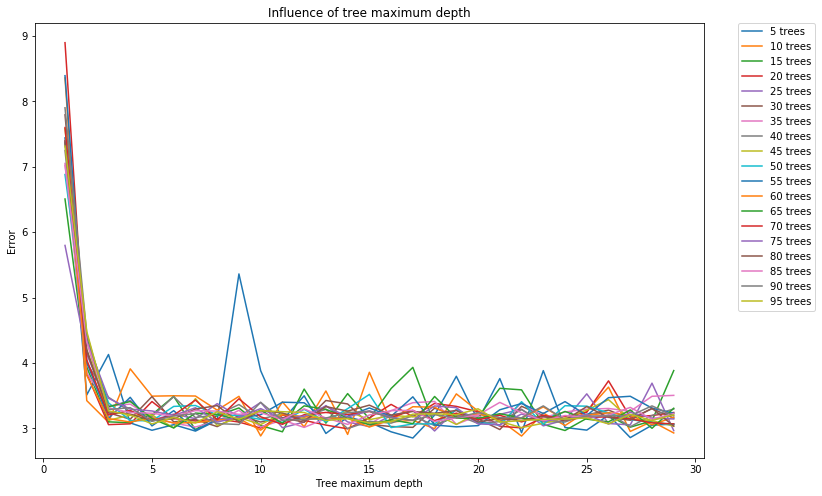

In [4]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.title("Influence of tree maximum depth")
plt.xlabel("Tree maximum depth")
plt.ylabel("Error")

x = list(baggers.keys())

# Plotting different line for each number of ensemble clfs
for i in estimator_rg:
    res = []
    for j in baggers.keys():
        clf = baggers[j][i]
        res.append(1-np.average(cross_val_score(clf, X, y)))
    plt.plot(x, res, label=str(i) + ' trees')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

------- COMMENT ---------

#### Role of L:

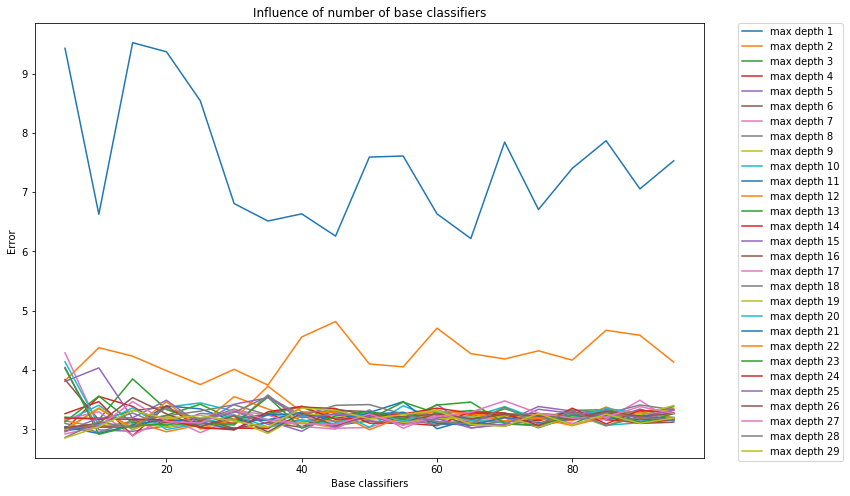

In [5]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.title("Influence of number of base classifiers")
plt.xlabel("Base classifiers")
plt.ylabel("Error")

x = estimator_rg

# Plotting different line for each number of maximum tree depth
for i in baggers.keys():
    res = []
    for clf in baggers[i].values():
        res.append(1-np.average(cross_val_score(clf, X, y)))
    plt.plot(x, res, label='max depth ' + str(i))

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

------- COMMENT ---------

### 3) How can we check that the estimators computed with the decision trees are biased and that the ones based on bagging reduce the variance?

#### Bias proof
In order to prove that estimators computed with the decision trees are biased, we need to show that no matter the depth of the tree, it will not reach an accuracy of 1 / an error of 0.

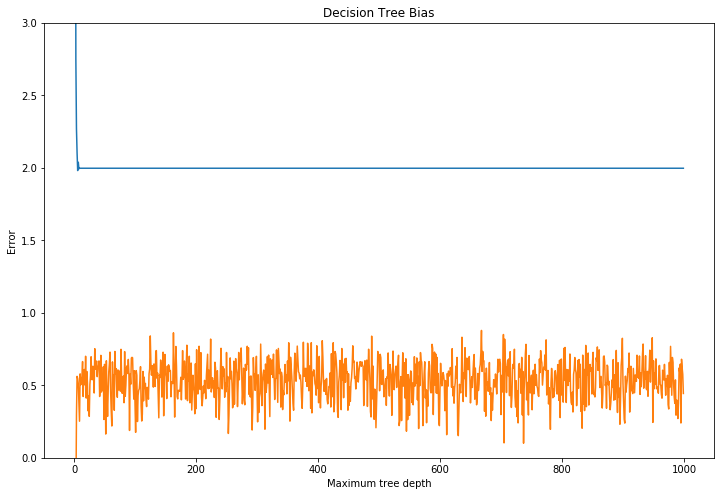

In [7]:
max_depth = 1000
L = 20
t_res = []
b_res = []

for i in range(1,max_depth):
    t_clf = DecisionTreeRegressor(max_depth=i)
    t_res.append(1-np.average(cross_val_score(t_clf, X, y, cv=10)))
    b_clf = BaggingRegressor(base_estimator=t_clf, n_estimators=L)
    b_res.append(1-np.average(cross_val_score(b_clf, X, y, cv=10)))

fig, ax = plt.subplots(figsize=(12, 8))
plt.title("Decision Tree Bias")
plt.xlabel("Maximum tree depth")
plt.ylabel("Error")
ax.set_ylim(0,3)
plt.plot(range(1, max_depth), t_res)
plt.plot(range(1, max_depth), b_res)
plt.show()

#### Variance reduction proof:

4) Playing with the noise level, show the over-fitting (sur-apprentissage).

5) Show that we can reduce this phenomenon by randomly sub-sampling (sous-échantillonner) without replacement instead than taking the bootstrap samples.

6) Evaluate the scores using Random Forests with a 7-fold cross-validation on the data-sets boston, diabetes, iris and digits. Compare the performances with the ones of a linear SVM.

7) Using the data-set iris, limited to the first two variables/features, show the prediction probabilities for each class. Start from the following script where you will vary the number of random trees (parameter n_estimators)

In [ ]:
# Parameters
n_estimators = 2
plot_colors = "bry"
plot_step = 0.02
# Load data
iris = load_iris()
X_unscaled, y = iris.data[:, :2], iris.target
# Standardize
X = preprocessing.scale(X_unscaled)
# RF fitting
model = RandomForestClassifier(n_estimators=n_estimators)
clf = model.fit(X, y)
# Plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
np.arange(y_min, y_max, plot_step))
plt.figure()
for tree in model.estimators_:
# TODO use predict to obtain the probabilities you will store in Z
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, alpha=1. / n_estimators, cmap=plt.cm.Paired)
plt.axis("tight")
# Plot the training points
for i, c in zip(range(3), plot_colors):
idx = np.where(y == i)
plt.scatter(X[idx, 0], X[idx, 1], c=c, label=iris.target_names[i],
cmap=plt.cm.Paired)
plt.legend(scatterpoints=1)
plt.show()

### 8) Compare the scores between Random Forests with a 6-fold cross-validation and the pure decision trees (obtained with DecisionTreeClassifier), on the data-set iris limited to the first two features/variables. Vary the parameter max_depth between 1 and 30. Show that both Random Forests and deep decision trees reduce the over-fitting